# Loading dataset into Pandas

In [282]:
# January 2021 data
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet

# February 2021 data
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet

--2022-05-24 14:57:00--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.217.71.60
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.217.71.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11886281 (11M) [binary/octet-stream]
Saving to: ‘fhv_tripdata_2021-01.parquet.11’

fhv_tripdata_2021-0 100%[===================>]  11.33M  40.6MB/s    in 0.3s    

2022-05-24 14:57:01 (40.6 MB/s) - ‘fhv_tripdata_2021-01.parquet.11’ saved [11886281/11886281]

--2022-05-24 14:57:01--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.216.110.75
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.216.110.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10645466 (10M) [binary/octet-stream]
Saving to: ‘fhv_tripdata_2021-02.parquet.11’



In [283]:
import pandas as pd
train_df = pd.read_parquet('/content/fhv_tripdata_2021-01.parquet')
valid_df = pd.read_parquet('/content/fhv_tripdata_2021-02.parquet')

In [284]:
# visualize some entries from January data
train_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [285]:
# Entry count for Jan 2021
train_df.shape

(1154112, 7)

# Q2. Computing average trip duration in January 2021

In [286]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [287]:
# Create column Duration
import datetime as dt

train_df.dropOff_datetime = pd.to_datetime(train_df['dropOff_datetime'])
train_df.pickup_datetime = pd.to_datetime(train_df['pickup_datetime'])

train_df['Duration'] = ((train_df['dropOff_datetime'] - train_df['pickup_datetime']).dt.seconds)/60
train_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,Duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


In [288]:
# Compute average duration for January 2021
avg_ride_duration_jan = train_df['Duration'].mean()
print(f'The average duration of taxi rides in January 2021 is {avg_ride_duration_jan} minutes.')

The average duration of taxi rides in January 2021 is 18.610744306736674 minutes.


In [289]:
valid_df.dropOff_datetime = pd.to_datetime(valid_df['dropOff_datetime'])
valid_df.pickup_datetime = pd.to_datetime(valid_df['pickup_datetime'])

valid_df['Duration'] = ((valid_df['dropOff_datetime'] - valid_df['pickup_datetime']).dt.seconds)/60
valid_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,Duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037,13.800000


In [290]:
# Compute average duration for January 2021
avg_ride_duration_feb = valid_df['Duration'].mean()
print(f'The average duration of taxi rides in January 2021 is {avg_ride_duration_feb} minutes.')

The average duration of taxi rides in January 2021 is 20.07836039017521 minutes.


# Data Preparation
### Q3. Missing values

In [291]:
# Test missing values
perc_missing_values_PU = train_df['PUlocationID'].isnull().sum() * 100 / len(train_df)
perc_missing_values_DO = train_df['DOlocationID'].isnull().sum() * 100 / len(train_df)

perc_total_missing = max(perc_missing_values_PU,perc_missing_values_DO)
print(f'Percentage of missing values for pickup-dropoff location IDs is {perc_total_missing}.')

Percentage of missing values for pickup-dropoff location IDs is 83.03067639882438.


In [292]:
# Fill January missing values with "-1"
train_df['PUlocationID'] = train_df['PUlocationID'].fillna(int(-1)).astype(int)
train_df['DOlocationID'] = train_df['DOlocationID'].fillna(int(-1)).astype(int)
train_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,Duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1,-1,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1,-1,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,-1,-1,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1,72,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1,61,None,B00037,15.216667


In [293]:
# Fill February missing values with "-1"
valid_df['PUlocationID'] = valid_df['PUlocationID'].fillna(int(-1)).astype(int)
valid_df['DOlocationID'] = valid_df['DOlocationID'].fillna(int(-1)).astype(int)
valid_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,Duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,-1,-1,None,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173,82,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173,56,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82,129,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1,225,None,B00037,13.800000


### Explore distrubution of target variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


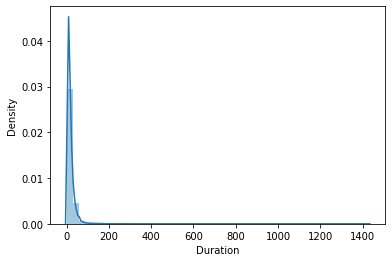

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train_df.Duration)

We can clearly see outliers in the target variable. The distribution is highly skewed.

In [295]:
train_df.Duration.describe(percentiles = [0.95, 0.98, 0.99])

count    1.154112e+06
mean     1.861074e+01
std      2.736175e+01
min      0.000000e+00
50%      1.340000e+01
95%      4.725000e+01
98%      6.610000e+01
99%      9.016667e+01
max      1.430000e+03
Name: Duration, dtype: float64

We can see from the 99-percentile that the majority of our data lives within ride durations below 90 minutes. 

We can filter out data such that longer duration rides are eliminated.

In [296]:
train_df = train_df[( train_df.Duration > 1 ) & (train_df.Duration < 90 )]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


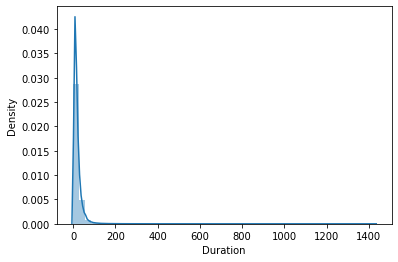

In [298]:
# check February validation distribution of target
sns.distplot(valid_df.Duration)

In [299]:
valid_df.Duration.describe(percentiles = [0.95, 0.98, 0.99])

count    1.037692e+06
mean     2.007836e+01
std      3.011512e+01
min      0.000000e+00
50%      1.410000e+01
95%      5.223333e+01
98%      7.545300e+01
99%      1.048167e+02
max      1.429850e+03
Name: Duration, dtype: float64

In [300]:
valid_df = valid_df[( valid_df.Duration > 1 ) & (valid_df.Duration < 90 )]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


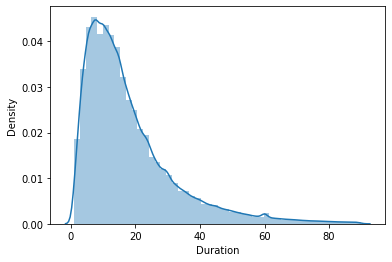

In [301]:
sns.distplot(valid_df.Duration)

### Q4. One-hot encoding of features

In [259]:
# Turn dataframe into dictionary
train_dict = train_df[['PUlocationID','DOlocationID']].to_dict(orient='records')
valid_dict = valid_df[['PUlocationID','DOlocationID']].to_dict(orient='records')

In [260]:
# Fit dictionary vectorizer to extract features
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(train_dict)
X_test = vectorizer.transform(valid_dict)

In [261]:
vectorizer.feature_names_

['DOlocationID', 'PUlocationID']

In [262]:
r, c = X_train.shape
print(f'The feature matrix has a dimensionality of {c}.')

The feature matrix has a dimensionality of 2.


# Q5. Training a model

In [263]:
# Define our target label
y_train = train_df['Duration'].values
y_test = valid_df['Duration'].values

y_train

array([17.        , 17.        ,  8.28333333, ..., 16.2       ,
       19.43333333, 36.        ])

In [264]:
# Build & train Linear Regression model from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [265]:
y_hat_train = LR.predict(X_train)

mean_squared_error(y_train, y_hat_train, squared = False)

13.192403522885812

# Q6. Evaluating the model

In [267]:
y_hat_val = LR.predict(X_test)

mean_squared_error(y_test, y_hat_val, squared = False)

14.132744355336499

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


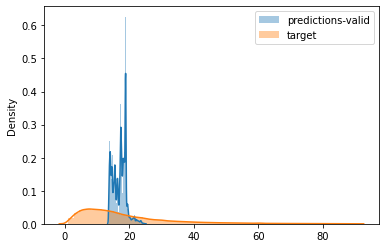

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y_hat_val, label='predictions-valid')
sns.distplot(y_test, label='target')

plt.legend()